In [2]:
import pandas as pd
data=pd.read_csv('clean_data.csv')
df=pd.DataFrame(data)
print(df.head())

   Cycle_length       Phase  Mood    Age  Sleep_4-5 hours  Sleep_6-7 hours  \
0          30.0  Follicular   7.0     25            False            False   
1          28.0   Menstrual   5.0  21-30            False             True   
2          28.0      Luteal   4.0  21-30            False            False   
3          28.0   Ovulation   5.0  21-30            False             True   
4          28.0  Follicular   7.0     25            False            False   

   Sleep_6-8 hours  Sleep_8-9 hours  Sleep_Less than 4 hours  \
0             True            False                    False   
1            False            False                    False   
2            False             True                    False   
3            False            False                    False   
4             True            False                    False   

   Workout_24 hours  Workout_57 hours  Workout_810 hours  \
0              False              False               False   
1              False

In [3]:
df.columns

Index(['Cycle_length', 'Phase', 'Mood', 'Age', 'Sleep_4-5 hours',
       'Sleep_6-7 hours', 'Sleep_6-8 hours', 'Sleep_8-9 hours',
       'Sleep_Less than 4 hours', 'Workout_24 hours', 'Workout_57 hours',
       'Workout_810 hours', 'Workout_Less than 2 hours',
       'Workout_More than 10 hours'],
      dtype='object')

In [4]:
features=df.drop(['Mood'],axis=1)
target=df['Mood']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [6]:
features = pd.get_dummies(features, columns=['Phase', 'Age'], drop_first=True)

In [7]:
#splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
model=DecisionTreeRegressor(random_state=42)

In [8]:
#fitting the model
model.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [9]:
#predicting the test set results
mood_predictions=model.predict(x_test)

In [10]:
#performance on the training data
print("R²:", model.score(x_train, y_train))

R²: 0.7507615965005742


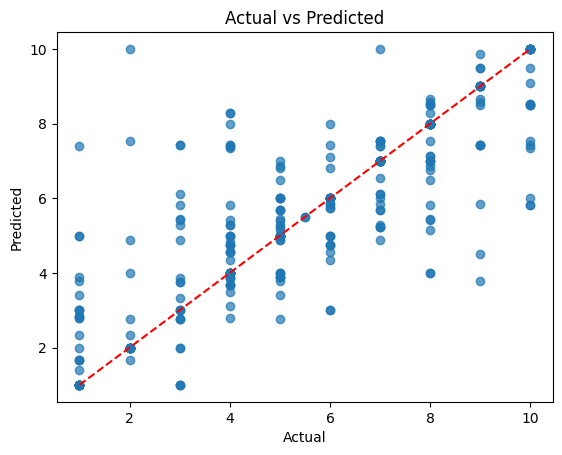

In [11]:
#plotting real values vs predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, mood_predictions, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 150 (\x96) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


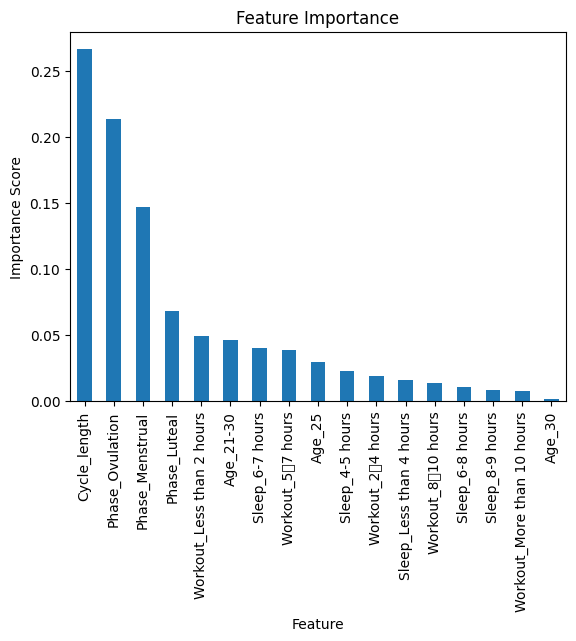

In [12]:
#plotting feature importance
import pandas as pd
import matplotlib.pyplot as plt

importance=model.feature_importances_
features=x_train.columns

# dataframe for visualization
feat_importance=pd.DataFrame({'Feature': features, 'Importance': importance})
feat_importance=feat_importance.sort_values(by='Importance', ascending=False)

feat_importance.plot(kind='bar', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance')
plt.ylabel('Importance Score')
plt.show()